## Feature Extraction through Central Moments

In [1]:
import numpy as np
import pandas as pd
import seaborn as sn
import cv2
import matplotlib.pyplot as plt

In [2]:
img = cv2.imread('Kaggle\yes\y0.jpg')
img.shape

(348, 287, 3)

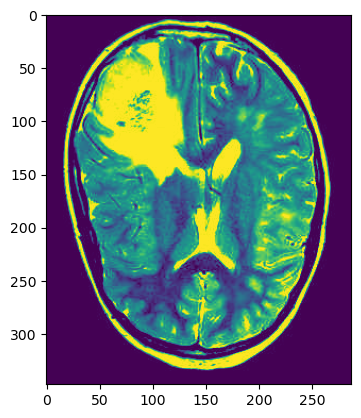

In [3]:
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
plt.imshow(gray)

In [4]:
gray.shape


(348, 287)

In [5]:
resize_img = cv2.resize(gray, (128, 128))
resize_img.shape

(128, 128)

In [10]:
l = []
n = 0
m = 0
for i in range(8):
    x = []
    for j in range(8):
        c = np.mean(resize_img[n:n+16,m:m+16])
        x.append(c)
        m+=16
    l.append(x)
    m=0
    n+=16
l

[[0.0,
  31.55859375,
  112.69921875,
  103.1640625,
  108.30859375,
  59.2890625,
  3.9375,
  0.0],
 [17.37890625,
  170.9921875,
  242.15625,
  143.59765625,
  106.69921875,
  111.16015625,
  91.72265625,
  0.01171875],
 [49.96875,
  189.77734375,
  247.10546875,
  193.03125,
  108.61328125,
  138.50390625,
  126.12890625,
  24.63671875],
 [45.88671875,
  128.06640625,
  171.96484375,
  150.390625,
  156.68359375,
  122.57421875,
  146.11328125,
  46.2421875],
 [31.5390625,
  99.328125,
  122.70703125,
  97.18359375,
  170.4296875,
  136.65625,
  161.52734375,
  31.15625],
 [7.43359375,
  76.01953125,
  99.65625,
  85.73046875,
  126.91796875,
  127.87109375,
  134.3203125,
  16.45703125],
 [0.0,
  41.10546875,
  77.58203125,
  114.3203125,
  127.3359375,
  133.44921875,
  71.5625,
  0.0],
 [0.0, 0.0, 32.11328125, 78.74609375, 94.3359375, 55.1640625, 0.4921875, 0.0]]

In [11]:
a = np.array(l)
a.shape

(8, 8)

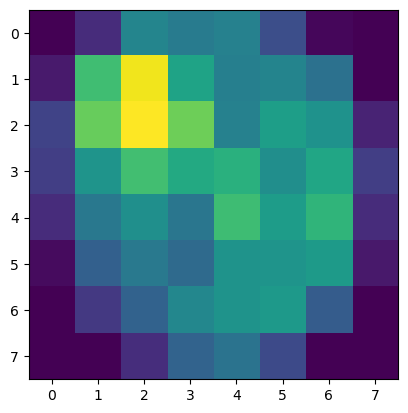

In [51]:
plt.imshow(a)

### Labling Images

In [4]:
import os
d = os.listdir()
path = []
path.append(os.listdir('.\\Kaggle\\yes'))
path.append(os.listdir('.\\Kaggle\\no'))
path = {'yes':path[0],'no':path[1]}

### With Image Size 128x128 and window of 16x16

In [26]:
x,y = [],[]
s = r"C:\Users\Sneh\Documents\Project\Brain Tumor Detection\Kaggle"
classification_dict = {'yes':1,'no':0}
for i in path.keys():
    for j in path[i]:
        img = cv2.imread(s + '\\' + i + '\\' + j)
        img = cv2.resize(img, (128, 128))
        l = []
        n = 0
        m = 0
        for _ in range(8):
            intr = []
            for __ in range(8):
                c = np.mean(img[n:n+16,m:m+16])
                intr.append(c)
                m+=16
            l.append(intr)
            m=0
            n+=16
        x.append(np.array(np.array(l).reshape(8*8,1)))
        y.append(classification_dict[i]) 

In [27]:
np.array(x).shape

(3000, 64, 1)

In [28]:
x = np.array(x).reshape(len(x),64).astype(float)
x.shape

(3000, 64)

In [29]:
x = np.array(x)
y = np.array(y)
x.shape,y.shape

((3000, 64), (3000,))

In [8]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [31]:
X_train, X_test, y_train, y_test = train_test_split(x, y,test_size=0.3 ,random_state=0)
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((2100, 64), (2100,), (900, 64), (900,))

In [32]:
svc = SVC(kernel='linear')
svc.fit(X_train,y_train)

SVC(kernel='linear')

In [33]:
from sklearn import metrics
print('Kernel = Linear')
print('Accuracy',metrics.accuracy_score(y_test,svc.predict(X_test)))
print('Precision',metrics.precision_score(y_test,svc.predict(X_test)))
print('Recall',metrics.recall_score(y_test,svc.predict(X_test)))

Kernel = Linear
Accuracy 0.7944444444444444
Precision 0.8221757322175732
Recall 0.7971602434077079


In [34]:
svc = SVC(kernel='poly')
svc.fit(X_train,y_train)

from sklearn import metrics
print('Kernel = Poly')
print('Accuracy',metrics.accuracy_score(y_test,svc.predict(X_test)))
print('Precision',metrics.precision_score(y_test,svc.predict(X_test)))
print('Recall',metrics.recall_score(y_test,svc.predict(X_test)))

Kernel = Poly
Accuracy 0.8288888888888889
Precision 0.9425587467362925
Recall 0.7322515212981744


In [35]:
svc = SVC(kernel='rbf')
svc.fit(X_train,y_train)

from sklearn import metrics
print('Kernel = RBF')
print('Accuracy',metrics.accuracy_score(y_test,svc.predict(X_test)))
print('Precision',metrics.precision_score(y_test,svc.predict(X_test)))
print('Recall',metrics.recall_score(y_test,svc.predict(X_test)))

Kernel = RBF
Accuracy 0.8511111111111112
Precision 0.8731808731808732
Recall 0.8519269776876268


In [36]:
256*256

65536

In [37]:
65536 / 256

256.0

### With Image Size 256x256 and window size 16x16

In [3]:
x,y = [],[]
s = r"C:\Users\Sneh\Documents\Project\Brain Tumor Detection\Kaggle"
classification_dict = {'yes':1,'no':0}
for i in path.keys():
    for j in path[i]:
        img = cv2.imread(s + '\\' + i + '\\' + j)
        img = cv2.resize(img, (256, 256))
        l = []
        n = 0
        m = 0
        for _ in range(16):
            intr = []
            for __ in range(16):
                c = np.mean(img[n:n+16,m:m+16])
                intr.append(c)
                m+=16
            l.append(intr)
            m=0
            n+=16
        x.append(np.array(np.array(l).reshape(16*16,1)))
        y.append(classification_dict[i]) 

NameError: name 'path' is not defined

In [4]:
np.array(x).shape

(3000, 256, 1)

In [5]:
x = np.array(x).reshape(len(x),256).astype(float)
x.shape

(3000, 256)

In [6]:
x = np.array(x)
y = np.array(y)
x.shape,y.shape

((3000, 256), (3000,))

In [9]:
X_train, X_test, y_train, y_test = train_test_split(x, y,test_size=0.3 ,random_state=0)
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((2100, 256), (2100,), (900, 256), (900,))

In [15]:
svc = SVC(kernel='linear')
svc.fit(X_train,y_train)
# from sklearn import metrics
# print('Kernel = Linear')
# print('Accuracy',metrics.accuracy_score(y_test,svc.predict(X_test)))
# print('Precision',metrics.precision_score(y_test,svc.predict(X_test)))
# print('Recall',metrics.recall_score(y_test,svc.predict(X_test)))

SVC(kernel='linear')

In [13]:
from sklearn import metrics
print('Kernel = Linear')
print('Accuracy',metrics.accuracy_score(y_test,svc.predict(X_test)))
print('Precision',metrics.precision_score(y_test,svc.predict(X_test)))
print('Recall',metrics.recall_score(y_test,svc.predict(X_test)))

Kernel = Linear
Accuracy 0.8755555555555555
Precision 0.9096774193548387
Recall 0.8580121703853956


In [11]:
svc = SVC(kernel='poly')
svc.fit(X_train,y_train)

from sklearn import metrics
print('Kernel = Poly')
print('Accuracy',metrics.accuracy_score(y_test,svc.predict(X_test)))
print('Precision',metrics.precision_score(y_test,svc.predict(X_test)))
print('Recall',metrics.recall_score(y_test,svc.predict(X_test)))

Kernel = Poly
Accuracy 0.8988888888888888
Precision 0.9631336405529954
Recall 0.847870182555781


In [12]:
svc = SVC(kernel='rbf')
svc.fit(X_train,y_train)

from sklearn import metrics
print('Kernel = RBF')
print('Accuracy',metrics.accuracy_score(y_test,svc.predict(X_test)))
print('Precision',metrics.precision_score(y_test,svc.predict(X_test)))
print('Recall',metrics.recall_score(y_test,svc.predict(X_test)))

Kernel = RBF
Accuracy 0.8755555555555555
Precision 0.9096774193548387
Recall 0.8580121703853956


### Feature Extraction with Standard Deviation

In [2]:
import os
d = os.listdir()
path = []
path.append(os.listdir('.\\Kaggle\\yes'))
path.append(os.listdir('.\\Kaggle\\no'))
path = {'yes':path[0],'no':path[1]}

In [3]:
x,y = [],[]
s = r"C:\Users\shahs\Documents\Project\Brain Tumor Detection\Kaggle"
classification_dict = {'yes':1,'no':0}
for i in path.keys():
    for j in path[i]:
        img = cv2.imread(s + '\\' + i + '\\' + j)
        img = cv2.resize(img, (128, 128))
        l = []
        n = 0
        m = 0
        for _ in range(8):
            intr = []
            for __ in range(8):
                c = np.std(img[n:n+16,m:m+16])
                intr.append(c)
                m+=16
            l.append(intr)
            m=0
            n+=16
        x.append(np.array(np.array(l).reshape(8*8,1)))
        y.append(classification_dict[i]) 

In [4]:
x = np.array(x).reshape(len(x),64).astype(float)
x.shape

(3000, 64)

In [5]:
x = np.array(x)
y = np.array(y)
x.shape,y.shape

((3000, 64), (3000,))

In [10]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [7]:
X_train, X_test, y_train, y_test = train_test_split(x, y,test_size=0.3 ,random_state=0)
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((2100, 64), (2100,), (900, 64), (900,))

In [8]:
svc = SVC(kernel='linear')
svc.fit(X_train,y_train)
from sklearn import metrics
print('Kernel = Linear')
print('Accuracy',metrics.accuracy_score(y_test,svc.predict(X_test)))
print('Precision',metrics.precision_score(y_test,svc.predict(X_test)))
print('Recall',metrics.recall_score(y_test,svc.predict(X_test)))

Kernel = Linear
Accuracy 0.7777777777777778
Precision 0.7995910020449898
Recall 0.7931034482758621


In [9]:
svc = SVC(kernel='poly')
svc.fit(X_train,y_train)

from sklearn import metrics
print('Kernel = Poly')
print('Accuracy',metrics.accuracy_score(y_test,svc.predict(X_test)))
print('Precision',metrics.precision_score(y_test,svc.predict(X_test)))
print('Recall',metrics.recall_score(y_test,svc.predict(X_test)))

Kernel = Poly
Accuracy 0.8733333333333333
Precision 0.9479905437352246
Recall 0.8133874239350912


In [10]:
svc = SVC(kernel='rbf')
svc.fit(X_train,y_train)

from sklearn import metrics
print('Kernel = RBF')
print('Accuracy',metrics.accuracy_score(y_test,svc.predict(X_test)))
print('Precision',metrics.precision_score(y_test,svc.predict(X_test)))
print('Recall',metrics.recall_score(y_test,svc.predict(X_test)))

Kernel = RBF
Accuracy 0.8411111111111111
Precision 0.854251012145749
Recall 0.8559837728194726


### Image size of 256x256

In [6]:
x,y = [],[]
s = r"C:\Users\Sneh\Documents\Project\Brain Tumor Detection\Kaggle"
classification_dict = {'yes':1,'no':0}
for i in path.keys():
    for j in path[i]:
        img = cv2.imread(s + '\\' + i + '\\' + j)
        img = cv2.resize(img, (256, 256))
        l = []
        n = 0
        m = 0
        for _ in range(16):
            intr = []
            for __ in range(16):
                c = np.mean(img[n:n+16,m:m+16])
                intr.append(c)
                m+=16
            l.append(intr)
            m=0
            n+=16
        x.append(np.array(np.array(l).reshape(16*16,1)))
        y.append(classification_dict[i]) 

In [7]:
x = np.array(x).reshape(len(x),256).astype(float)
x.shape

(3000, 256)

In [8]:
x = np.array(x)
y = np.array(y)
x.shape,y.shape

((3000, 256), (3000,))

In [11]:
X_train, X_test, y_train, y_test = train_test_split(x, y,test_size=0.3 ,random_state=0)
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((2100, 256), (2100,), (900, 256), (900,))

In [ ]:
svc = SVC(kernel='linear')
svc.fit(X_train,y_train)
from sklearn import metrics
print('Kernel = Linear')
print('Accuracy',metrics.accuracy_score(y_test,svc.predict(X_test)))
print('Precision',metrics.precision_score(y_test,svc.predict(X_test)))
print('Recall',metrics.recall_score(y_test,svc.predict(X_test)))

In [ ]:
svc = SVC(kernel='poly')
svc.fit(X_train,y_train)

from sklearn import metrics
print('Kernel = Poly')
print('Accuracy',metrics.accuracy_score(y_test,svc.predict(X_test)))
print('Precision',metrics.precision_score(y_test,svc.predict(X_test)))
print('Recall',metrics.recall_score(y_test,svc.predict(X_test)))

In [ ]:
svc = SVC(kernel='rbf')
svc.fit(X_train,y_train)

from sklearn import metrics
print('Kernel = RBF')
print('Accuracy',metrics.accuracy_score(y_test,svc.predict(X_test)))
print('Precision',metrics.precision_score(y_test,svc.predict(X_test)))
print('Recall',metrics.recall_score(y_test,svc.predict(X_test)))

In [15]:
import joblib
joblib.dump(svc,'svm_std.pkl')

['svm_std.pkl']